# Conjugate Gradient for logistic regression

Author: Alexandre Gramfort

In [3]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg

In [4]:
fmin_cg?

In [5]:
from sklearn import datasets
from sklearn.linear_model import ridge_regression, LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Make it binary
X = X[y < 2]
y = y[y < 2]

# add intercept column of ones
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

y[y == 0] = -1

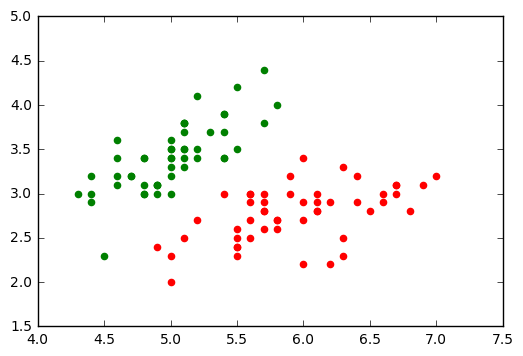

In [6]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')

In [7]:
all_pobj = []

def f(w):
    pobj = np.sum(np.log(1. + np.exp(- y * np.dot(X, w))))
    all_pobj.append(pobj)
    return pobj

def fprime(w):
    ywTx = y * np.dot(X, w)
    temp = 1. / (1. + np.exp(ywTx))
    grad = -np.dot(X.T, (y * temp))
    return grad

In [8]:
alpha = 0.01
n_features = X.shape[1]
w = fmin_cg(f, np.zeros(n_features), fprime)

         Current function value: 0.032523
         Iterations: 14
         Function evaluations: 45
         Gradient evaluations: 33


In [9]:
np.sign(np.dot(X, w)) - y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

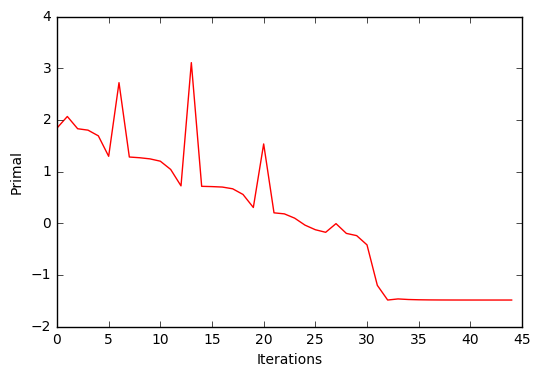

In [10]:
plt.plot(np.log10(all_pobj), 'r')
plt.xlabel('Iterations')
plt.ylabel('Primal')
plt.show()

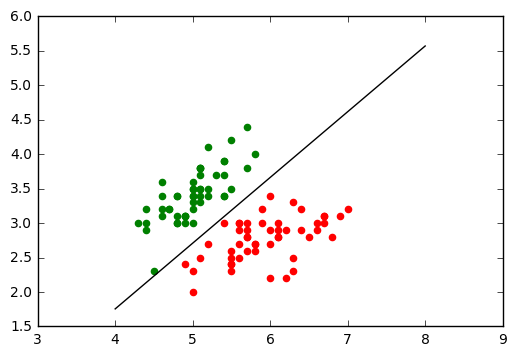

In [11]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')
xx = np.linspace(4, 8, 10)
plt.plot(xx,  - xx * w[0] / w[1] - w[2] / w[1], 'k')

### Question : ajouter le support de l'intercept (attention non-régularisé)